<a href="https://colab.research.google.com/github/andreeeTrujillo21/Aprendizaje-Supervisado-/blob/main/SELU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANÁLISIS DE SELU - Scaled Exponential Linear Unit
Función de Activación en Redes Neuronales Artificiales**



1. IMPORTAR LIBRERIAS



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Configuración visual
plt.style.use('seaborn-v0_8-darkgrid')

print(" Librerías importadas correctamente")
print(f" TensorFlow versión: {tf.__version__}")
print(f" NumPy versión: {np.__version__}")

 Librerías importadas correctamente
 TensorFlow versión: 2.19.0
 NumPy versión: 2.0.2


2.   DEFINIR FUNCIÓN SELU Y SU DERIVADA

In [ ]:
# Parámetros exactos de SELU
ALPHA = 1.6732632423543772848170429916717
LAMBDA = 1.0507009873554804934193349852946

def selu(x):
    """
    Función de activación SELU
    SELU(x) = λ*x si x>0, λ*α*(e^x - 1) si x≤0
    """
    return np.where(x > 0,
                    LAMBDA * x,
                    LAMBDA * ALPHA * (np.exp(x) - 1))

def selu_derivative(x):
    """
    Derivada de SELU para backpropagation
    SELU'(x) = λ si x>0, λ*α*e^x si x<0
    """
    return np.where(x > 0,
                    LAMBDA,
                    LAMBDA * ALPHA * np.exp(x))

print(" Funciones SELU definidas")
print(f"   α (alpha)  = {ALPHA}")
print(f"   λ (lambda) = {LAMBDA}")

# Ejemplo con un valor
ejemplo = -0.04
print(f"\n Ejemplo: SELU({ejemplo}) = {selu(ejemplo):.6f}")
print(f" Derivada: SELU'({ejemplo}) = {selu_derivative(ejemplo):.6f}")


 Funciones SELU definidas
   α (alpha)  = 1.6732632423543772
   λ (lambda) = 1.0507009873554805

 Ejemplo: SELU(-0.04) = -0.068936
 Derivada: SELU'(-0.04) = 1.689163




3.   APLICAR SELU A UN VECTOR DE ENTRADAS



In [ ]:
# Crear vector de entrada
vector_entrada = np.array([-2.0, -1.0, -0.5, 0.0, 0.5, 1.0, 2.0])

# Aplicar SELU
vector_salida = selu(vector_entrada)

# Calcular derivadas
vector_derivadas = selu_derivative(vector_entrada)

# Mostrar resultados
print(f"\n1. Vector de entrada:")
print(f"   x = {vector_entrada}")

print(f"\n2. Aplicando SELU(x):")
print(f"   SELU(x) = {vector_salida}")

print(f"\n3. Derivadas SELU'(x):")
print(f"   SELU'(x) = {vector_derivadas}")

# Tabla detallada
print("\n" + "="*60)
print(f"{'x':>8} | {'SELU(x)':>12} | {'SELU\'(x)':>12}")
print("="*60)
for x, y, dy in zip(vector_entrada, vector_salida, vector_derivadas):
    print(f"{x:8.2f} | {y:12.6f} | {dy:12.6f}")
print("="*60)




1. Vector de entrada:
   x = [-2.  -1.  -0.5  0.   0.5  1.   2. ]

2. Aplicando SELU(x):
   SELU(x) = [-1.52016647 -1.11133074 -0.69175819  0.          0.52535049  1.05070099
  2.10140197]

3. Derivadas SELU'(x):
   SELU'(x) = [0.23793287 0.6467686  1.06634115 1.75809934 1.05070099 1.05070099
 1.05070099]

       x |      SELU(x) |     SELU'(x)
   -2.00 |    -1.520166 |     0.237933
   -1.00 |    -1.111331 |     0.646769
   -0.50 |    -0.691758 |     1.066341
    0.00 |     0.000000 |     1.758099
    0.50 |     0.525350 |     1.050701
    1.00 |     1.050701 |     1.050701
    2.00 |     2.101402 |     1.050701


4.   GRÁFICO DE LA FUNCIÓN SELU


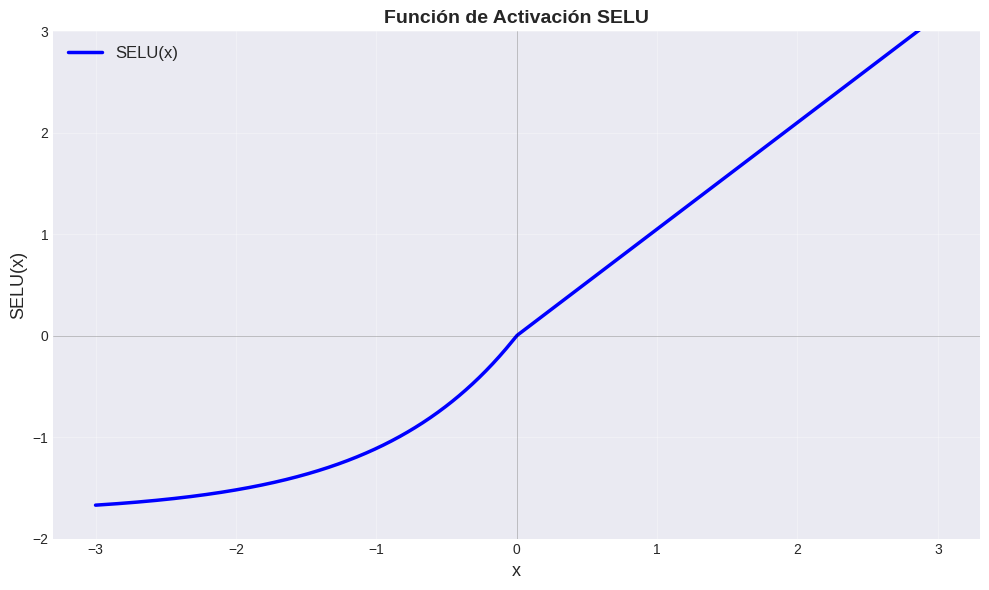

In [ ]:
# Generar rango de valores
x_range = np.linspace(-3, 3, 1000)
y_selu = selu(x_range)

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_range, y_selu, 'b-', linewidth=2.5, label='SELU(x)')
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=13)
plt.ylabel('SELU(x)', fontsize=13)
plt.title('Función de Activación SELU', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.ylim([-2, 3])
plt.tight_layout()
plt.show()




5.   GRÁFICO DE LA DERIVADA DE SELU




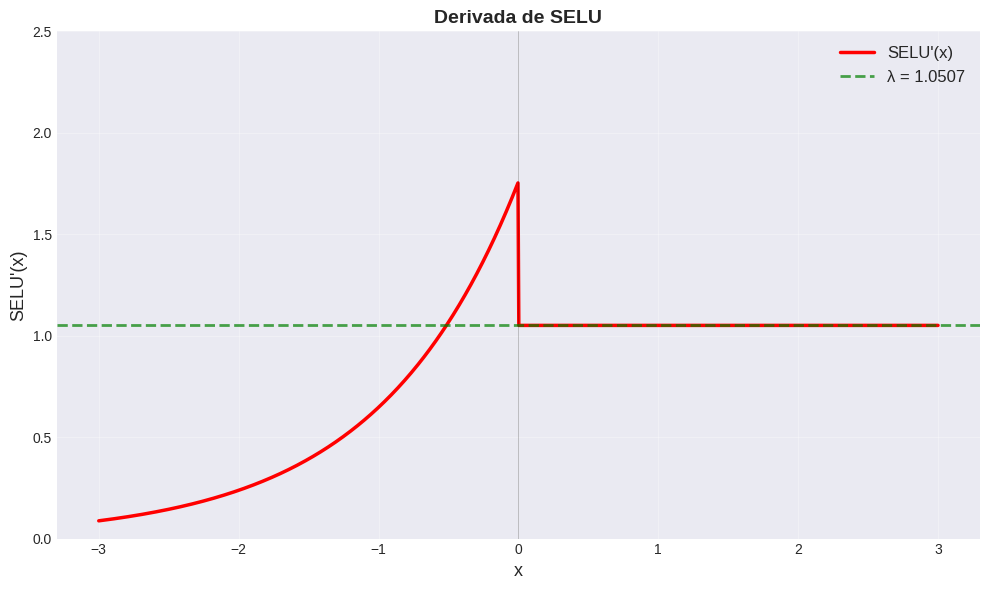

    Para x>0, la derivada es constante = 1.0507
    Para x<0, la derivada varía suavemente


In [ ]:
# Generar rango de valores
x_range = np.linspace(-3, 3, 1000)
y_derivative = selu_derivative(x_range)

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_range, y_derivative, 'r-', linewidth=2.5, label="SELU'(x)")
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
plt.axhline(y=LAMBDA, color='g', linestyle='--', linewidth=2, alpha=0.7,
            label=f'λ = {LAMBDA:.4f}')
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=13)
plt.ylabel("SELU'(x)", fontsize=13)
plt.title('Derivada de SELU', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.ylim([0, 2.5])
plt.tight_layout()
plt.show()

print(f"    Para x>0, la derivada es constante = {LAMBDA:.4f}")
print(f"    Para x<0, la derivada varía suavemente")




6.   COMPARACIÓN CON OTRAS FUNCIONES



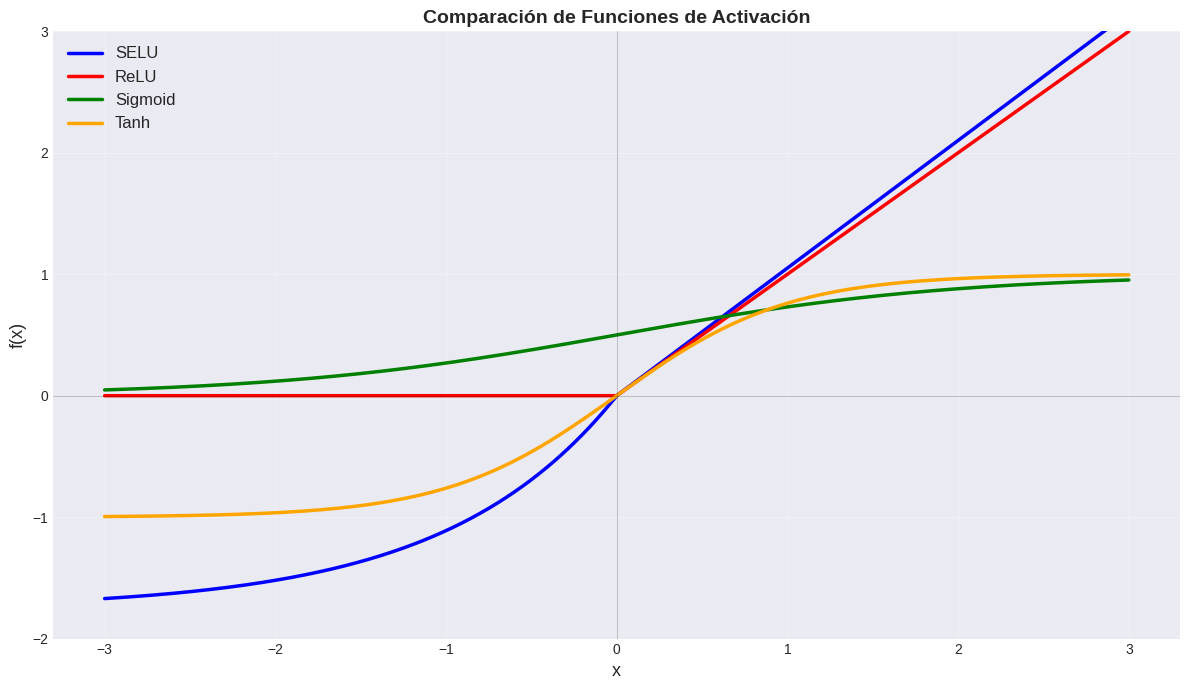


 Observaciones:
   • SELU tiene valores negativos (no se anula como ReLU)
   • SELU no está acotada superiormente (a diferencia de Sigmoid/Tanh)
   • SELU es similar a ELU pero con escalado específico


In [ ]:
# Definir otras funciones de activación
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def tanh_fn(x):
    return np.tanh(x)

# Generar datos
x_range = np.linspace(-3, 3, 1000)

# Crear gráfico comparativo
plt.figure(figsize=(12, 7))
plt.plot(x_range, selu(x_range), 'b-', linewidth=2.5, label='SELU')
plt.plot(x_range, relu(x_range), 'r-', linewidth=2.5, label='ReLU')
plt.plot(x_range, sigmoid(x_range), 'g-', linewidth=2.5, label='Sigmoid')
plt.plot(x_range, tanh_fn(x_range), 'orange', linewidth=2.5, label='Tanh')

plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=13)
plt.ylabel('f(x)', fontsize=13)
plt.title('Comparación de Funciones de Activación', fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc='upper left')
plt.ylim([-2, 3])
plt.tight_layout()
plt.show()

print("\n Observaciones:")
print("   • SELU tiene valores negativos (no se anula como ReLU)")
print("   • SELU no está acotada superiormente (a diferencia de Sigmoid/Tanh)")
print("   • SELU es similar a ELU pero con escalado específico")




7.   GENERAR DATASET PARA CLASIFICACIÓN BINARIA



In [ ]:
# Generar dataset sintético
print("\n1. Generando dataset de clasificación binaria...")
X, y = make_classification(
    n_samples=300,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    random_state=42,
    flip_y=0.1
)

# Normalizar datos (IMPORTANTE para SELU)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"    Dataset generado")
print(f"    Muestras totales: {X.shape[0]}")
print(f"    Entrenamiento: {X_train.shape[0]} muestras")
print(f"    Prueba: {X_test.shape[0]} muestras")
print(f"    Características: {X_train.shape[1]}")
print(f"    Clases: {len(np.unique(y))} (binaria)")

# Mostrar distribución de clases
print(f"\n2. Distribución de clases:")
print(f"   Clase 0: {np.sum(y_train == 0)} muestras")
print(f"   Clase 1: {np.sum(y_train == 1)} muestras")



1. Generando dataset de clasificación binaria...
    Dataset generado
    Muestras totales: 300
    Entrenamiento: 240 muestras
    Prueba: 60 muestras
    Características: 20
    Clases: 2 (binaria)

2. Distribución de clases:
   Clase 0: 117 muestras
   Clase 1: 123 muestras




8.   CONSTRUIR MODELO CON SELU




In [ ]:
model_selu = keras.Sequential([
    layers.Input(shape=(20,)),

    layers.Dense(64, activation='selu', kernel_initializer='lecun_normal'),
    layers.AlphaDropout(0.1),

    layers.Dense(32, activation='selu', kernel_initializer='lecun_normal'),
    layers.AlphaDropout(0.1),

    layers.Dense(16, activation='selu', kernel_initializer='lecun_normal'),

    layers.Dense(1, activation='sigmoid')
])

# Compilar modelo
model_selu.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\n Modelo construido")
print("\n Arquitectura del modelo:")
model_selu.summary()

print("\n Puntos clave:")
print("   • Función de activación: SELU")
print("   • Inicialización: LeCun Normal (obligatorio para SELU)")
print("   • Dropout: AlphaDropout (especializado para SELU)")
print("   • Capas: 64 → 32 → 16 → 1")


 Modelo construido

 Arquitectura del modelo:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_8 (AlphaDropout)  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_9 (AlphaDropout)  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,969 (15.50 KB)

 Non-trainable params: 0 (0.00 B)


 Puntos clave:
   • Función de activación: SELU
   • Inicialización: LeCun Normal (obligatorio para SELU)
   • Dropout: AlphaDropout (especializado para SELU)
   • Capas: 64 → 32 → 16 → 1




9.   ENTRENAR MODELO



In [ ]:
# Entrenar modelo
history_selu = model_selu.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.15,
    verbose=1  # Mostrar progreso época por época
)

print("\n Entrenamiento completado")

# Evaluar en conjunto de prueba
test_loss, test_acc = model_selu.evaluate(X_test, y_test, verbose=0)

print("\n" + "="*60)
print(" RESULTADOS FINALES")
print("="*60)
print(f"    Exactitud en entrenamiento: {history_selu.history['accuracy'][-1]:.4f}")
print(f"    Exactitud en validación:    {history_selu.history['val_accuracy'][-1]:.4f}")
print(f"    Exactitud en prueba:        {test_acc:.4f}")
print(f"    Pérdida en prueba:          {test_loss:.4f}")
print("="*60)


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5049 - loss: 0.8631 - val_accuracy: 0.5000 - val_loss: 0.7640
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6376 - loss: 0.7023 - val_accuracy: 0.6389 - val_loss: 0.6708
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6418 - loss: 0.6646 - val_accuracy: 0.6389 - val_loss: 0.6207
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7430 - loss: 0.4767 - val_accuracy: 0.6667 - val_loss: 0.5690
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6743 - loss: 0.6404 - val_accuracy: 0.6944 - val_loss: 0.5410
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7441 - loss: 0.5046 - val_accuracy: 0.7222 - val_loss: 0.5334
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7216 - loss: 0.5282 - val_accuracy: 0.7222 - val_loss: 0.5351
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7110 - loss: 0.6005 - val_accuracy: 0.6944 - va



10.   GRÁFICOS DE EVOLUCIÓN DEL ENTRENAMIENTO



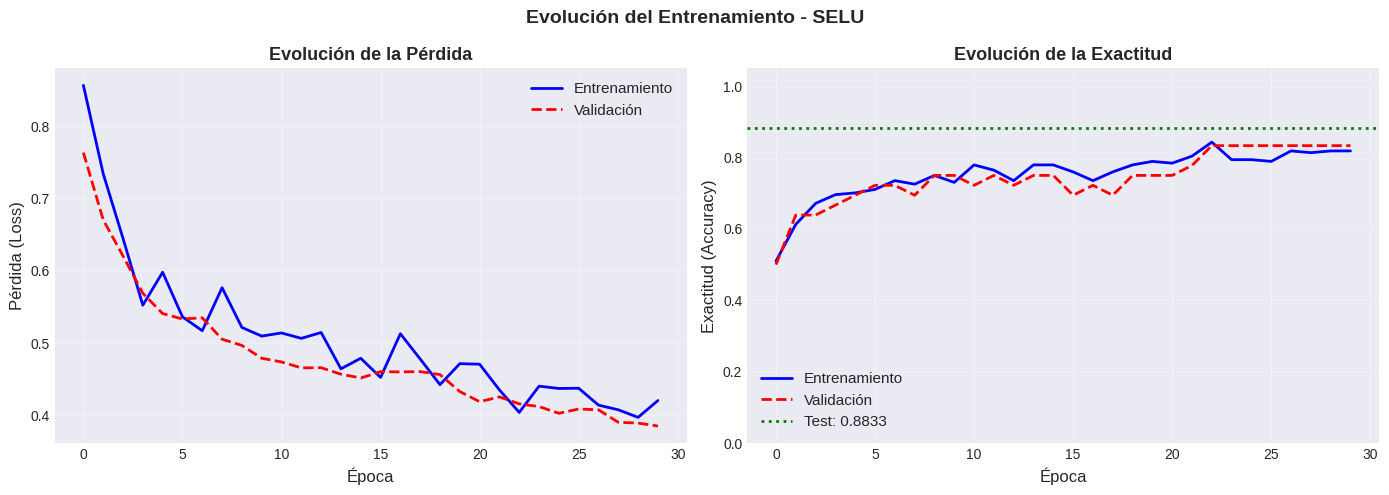


 Gráficos generados

 Observaciones:
   • La pérdida disminuye consistentemente
   • La exactitud mejora época tras época
   • No hay overfitting significativo (validación similar a entrenamiento)
   • SELU permite convergencia estable


In [ ]:
# Crear figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Evolución del Entrenamiento - SELU', fontsize=14, fontweight='bold')

# Subplot 1: Pérdida (Loss)
axes[0].plot(history_selu.history['loss'], 'b-', linewidth=2, label='Entrenamiento')
axes[0].plot(history_selu.history['val_loss'], 'r--', linewidth=2, label='Validación')
axes[0].set_xlabel('Época', fontsize=12)
axes[0].set_ylabel('Pérdida (Loss)', fontsize=12)
axes[0].set_title('Evolución de la Pérdida', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Subplot 2: Exactitud (Accuracy)
axes[1].plot(history_selu.history['accuracy'], 'b-', linewidth=2, label='Entrenamiento')
axes[1].plot(history_selu.history['val_accuracy'], 'r--', linewidth=2, label='Validación')
axes[1].axhline(y=test_acc, color='g', linestyle=':', linewidth=2,
               label=f'Test: {test_acc:.4f}')
axes[1].set_xlabel('Época', fontsize=12)
axes[1].set_ylabel('Exactitud (Accuracy)', fontsize=12)
axes[1].set_title('Evolución de la Exactitud', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 1.05])

plt.tight_layout()
plt.show()

print("\n Gráficos generados")
print("\n Observaciones:")
print("   • La pérdida disminuye consistentemente")
print("   • La exactitud mejora época tras época")
print("   • No hay overfitting significativo (validación similar a entrenamiento)")
print("   • SELU permite convergencia estable")




11.   PREDICCIONES EN NUEVAS MUESTRAS



In [ ]:
# Tomar 10 muestras del conjunto de prueba
n_samples = 10
samples_indices = np.random.choice(len(X_test), n_samples, replace=False)
samples = X_test[samples_indices]
true_labels = y_test[samples_indices]

# Predecir
predictions = model_selu.predict(samples, verbose=0)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Mostrar resultados
print("\n Tabla de Predicciones:")
print("="*70)
print(f"{'Muestra':>8} | {'Probabilidad':>14} | {'Predicción':>12} | {'Real':>8} | {'✓/✗':>5}")
print("="*70)

for i, (pred, pred_class, true_class) in enumerate(zip(predictions, predicted_classes, true_labels)):
    correcto = "✓" if pred_class == true_class else "✗"
    print(f"{i+1:8d} | {pred[0]:14.6f} | {pred_class:12d} | {true_class:8d} | {correcto:>5}")

print("="*70)

# Calcular exactitud en estas muestras
accuracy_samples = np.mean(predicted_classes == true_labels)
print(f"\n Exactitud en estas {n_samples} muestras: {accuracy_samples:.2%}")
print(f"   Correctas: {np.sum(predicted_classes == true_labels)}/{n_samples}")



 Tabla de Predicciones:
 Muestra |   Probabilidad |   Predicción |     Real |   ✓/✗
       1 |       0.059208 |            0 |        0 |     ✓
       2 |       0.005495 |            0 |        0 |     ✓
       3 |       0.962074 |            1 |        1 |     ✓
       4 |       0.993550 |            1 |        1 |     ✓
       5 |       0.820339 |            1 |        1 |     ✓
       6 |       0.004145 |            0 |        0 |     ✓
       7 |       0.043367 |            0 |        0 |     ✓
       8 |       0.014916 |            0 |        0 |     ✓
       9 |       0.048033 |            0 |        0 |     ✓
      10 |       0.060947 |            0 |        0 |     ✓

 Exactitud en estas 10 muestras: 100.00%
   Correctas: 10/10




12.   RESUMEN FINAL




In [ ]:
print(f"""

1. PARÁMETROS DE SELU:
   α (alpha)  = {ALPHA}
   λ (lambda) = {LAMBDA}

2. APLICACIÓN A VECTOR:
    SELU se aplica elemento por elemento
    Valores negativos se transforman suavemente (no se anulan)
    Valores positivos se escalan por λ ≈ 1.05

3. GRÁFICOS GENERADOS:
    Función SELU(x)
    Derivada SELU'(x)
    Comparación con ReLU, Sigmoid, Tanh
    Evolución del entrenamiento

4. EJEMPLO DE CLASIFICACIÓN BINARIA:
    Dataset: 300 muestras, 20 características
    Arquitectura: 64 → 32 → 16 → 1 neuronas
    Exactitud en prueba: {test_acc:.4f}
    Pérdida en prueba: {test_loss:.4f}

5. VENTAJAS DE SELU OBSERVADAS:
    Autonormalización (sin Batch Normalization)
    Entrenamiento estable
    Sin neuronas muertas (dying neurons)
    Convergencia suave época tras época
    Funciona bien en redes profundas

6. REQUISITOS PARA USAR SELU:
    Inicialización LeCun Normal (obligatorio)
    Alpha Dropout (no dropout estándar)
    Normalizar entradas (media=0, std=1)
    Capas con >100 neuronas (ideal)

""")

print("\n CONCLUSIONES:")
print("   • SELU es ideal para redes neuronales densas profundas")
print("   • Simplifica arquitectura (no necesita Batch Normalization)")
print("   • Requiere configuración específica pero los resultados valen la pena")
print("   • Excelente para datos tabulares y problemas de clasificación")




1. PARÁMETROS DE SELU:
   α (alpha)  = 1.6732632423543772
   λ (lambda) = 1.0507009873554805

2. APLICACIÓN A VECTOR:
    SELU se aplica elemento por elemento
    Valores negativos se transforman suavemente (no se anulan)
    Valores positivos se escalan por λ ≈ 1.05

3. GRÁFICOS GENERADOS:
    Función SELU(x)
    Derivada SELU'(x)
    Comparación con ReLU, Sigmoid, Tanh
    Evolución del entrenamiento

4. EJEMPLO DE CLASIFICACIÓN BINARIA:
    Dataset: 300 muestras, 20 características
    Arquitectura: 64 → 32 → 16 → 1 neuronas
    Exactitud en prueba: 0.8833
    Pérdida en prueba: 0.3415

5. VENTAJAS DE SELU OBSERVADAS:
    Autonormalización (sin Batch Normalization)
    Entrenamiento estable
    Sin neuronas muertas (dying neurons)
    Convergencia suave época tras época
    Funciona bien en redes profundas

6. REQUISITOS PARA USAR SELU:
    Inicialización LeCun Normal (obligatorio)
    Alpha Dropout (no dropout estándar)
    Normalizar entradas (media=0, std=1)
    Capas con >100 